# IMPORT LIBRARIES

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Data Wrangling
import pandas as pd
import numpy as np 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import norm, johnsonsu, lognorm
import scipy as st

import warnings
warnings.simplefilter('ignore')


# IMPORT DATASETS

In [3]:
train_dir = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_dir = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'

In [4]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)

# READ DATASETS

In [5]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

# PREPROCESSING

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_df.isnull().sum().sort_values(ascending= False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [9]:
test_df.isnull().sum().sort_values(ascending= False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [10]:
train_df.isnull().mean().sort_values(ascending= False)*100

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [11]:
100 * (train_df.isnull().sum()/ len(train_df)).sort_values(ascending= False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

<AxesSubplot:>

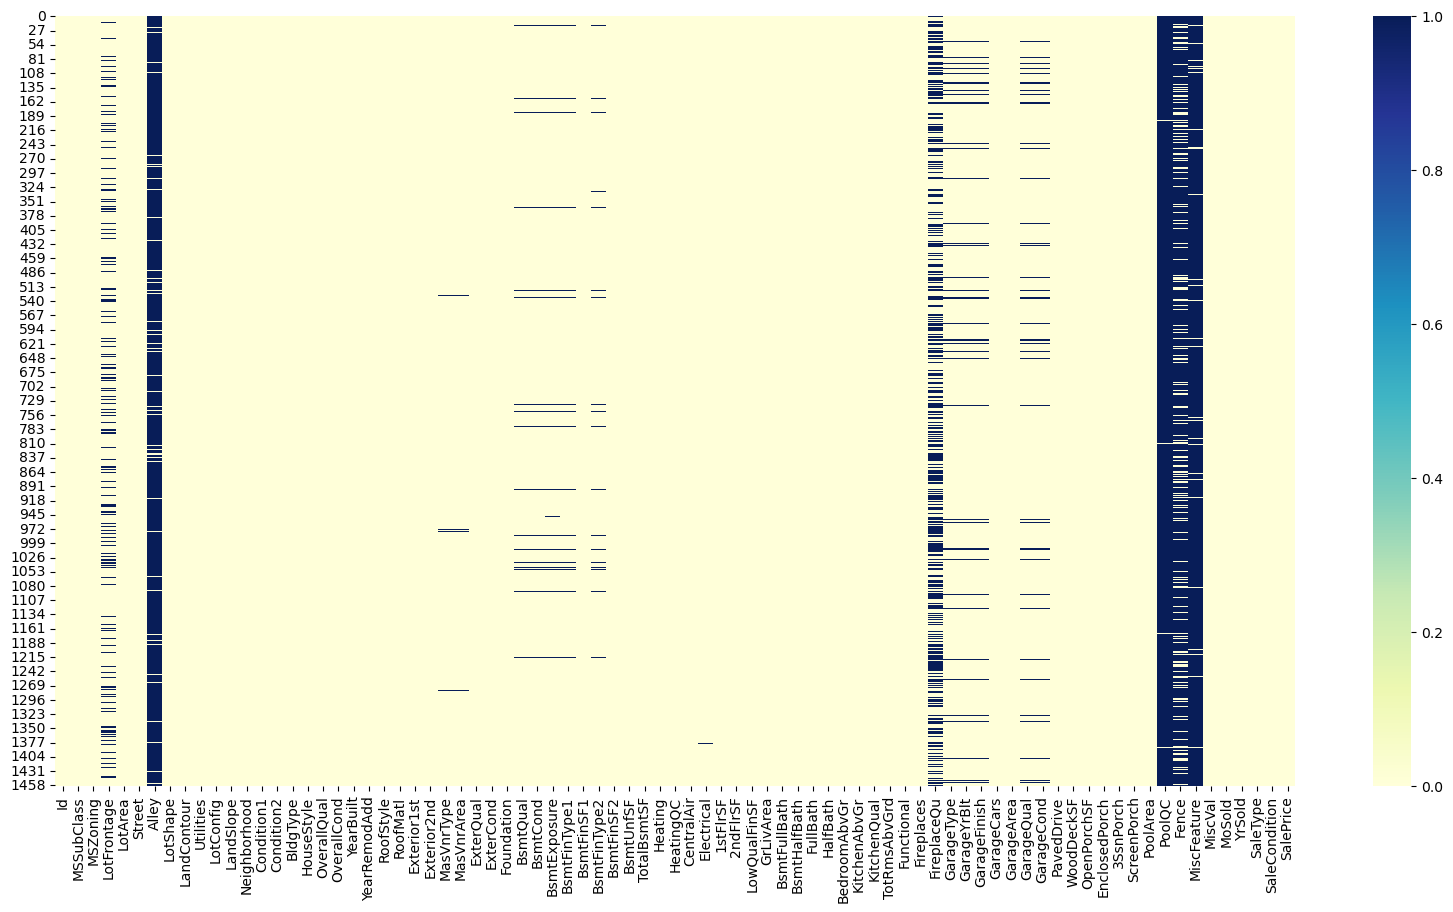

In [12]:
plt.figure(figsize= (20,10))
sns.heatmap(train_df.isnull(),cmap= 'YlGnBu')

In [13]:
null_cols = [col for col in train_df if any(train_df[col].isnull()) is True]
null_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [14]:
null_cols_test = [col for col in test_df if any(test_df[col].isnull()) is True]
null_cols_test

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

<AxesSubplot:>

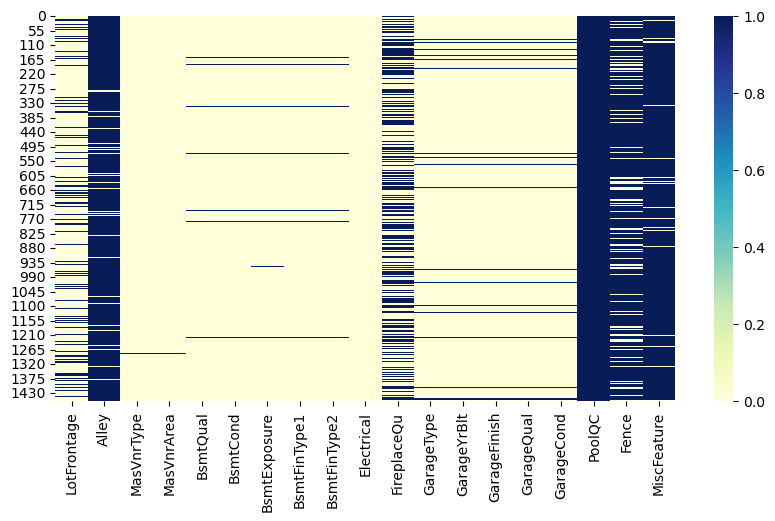

In [15]:
plt.figure(figsize= (10,5))
sns.heatmap(train_df[null_cols].isnull(),cmap= 'YlGnBu')

In [16]:
train_df['Electrical'].isnull().sum()

1

In [17]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## FEATURE ANALYSIS

In [18]:
train_df.nunique().sort_values(ascending= False)

Id            1460
LotArea       1073
GrLivArea      861
BsmtUnfSF      780
1stFlrSF       753
              ... 
HalfBath         3
Street           2
CentralAir       2
Utilities        2
Alley            2
Length: 81, dtype: int64

In [19]:
train_df.select_dtypes(include= object).nunique().sort_values(ascending= False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

In [20]:
train_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [21]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [22]:
cat_var = [cols for cols in train_df if train_df[cols].dtype == 'object']
train_df[cat_var].dtypes.unique()

array([dtype('O')], dtype=object)

In [23]:
num_var = [cols for cols in train_df if train_df[cols].dtype != 'object']
train_df[num_var].dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [24]:
cat_var_test = [cols for cols in test_df if test_df[cols].dtype == 'object']
num_var_test = [cols for cols in test_df if test_df[cols].dtype != 'object']


In [25]:
train_df_obj = train_df.select_dtypes(include= object)
variables = train_df_obj.columns

unique_train_df_obj = pd.DataFrame(variables,columns= ['Variable'])

unique_vals = []
for var in variables:
    unique_vals.append(train_df_obj[var].unique())

unique_train_df_obj['Unique'] = unique_vals
unique_train_df_obj


Variable                                             Unique
0        MSZoning                          [RL, RM, C (all), FV, RH]
1          Street                                       [Pave, Grvl]
2           Alley                                  [nan, Grvl, Pave]
3        LotShape                               [Reg, IR1, IR2, IR3]
4     LandContour                               [Lvl, Bnk, Low, HLS]
5       Utilities                                   [AllPub, NoSeWa]
6       LotConfig                [Inside, FR2, Corner, CulDSac, FR3]
7       LandSlope                                    [Gtl, Mod, Sev]
8    Neighborhood  [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
9      Condition1  [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
10     Condition2  [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...
11       BldgType              [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
12     HouseStyle  [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...
13      RoofStyle         [Gable, Hip, Gambrel, Mansard, Flat, Shed]
14       RoofMatl  [CompShg, WdShngl, Metal, WdShake, Membran, Ta...
15    Exterior1st  [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...
16    Exterior2nd  [VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...
17     MasVnrType                [BrkFace, None, Stone, BrkCmn, nan]
18      ExterQual                                   [Gd, TA, Ex, Fa]
19      ExterCond                               [TA, Gd, Fa, Po, Ex]
20     Foundation         [PConc, CBlock, BrkTil, Wood, Slab, Stone]
21       BsmtQual                              [Gd, TA, Ex, nan, Fa]
22       BsmtCond                              [TA, Gd, nan, Fa, Po]
23   BsmtExposure                              [No, Gd, Mn, Av, nan]
24   BsmtFinType1                [GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]
25   BsmtFinType2                [Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]
26        Heating              [GasA, GasW, Grav, Wall, OthW, Floor]
27      HeatingQC                               [Ex, Gd, TA, Fa, Po]
28     CentralAir                                             [Y, N]
29     Electrical             [SBrkr, FuseF, FuseA, FuseP, Mix, nan]
30    KitchenQual                                   [Gd, TA, Ex, Fa]
31     Functional            [Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]
32    FireplaceQu                          [nan, TA, Gd, Fa, Ex, Po]
33     GarageType  [Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...
34   GarageFinish                               [RFn, Unf, Fin, nan]
35     GarageQual                          [TA, Fa, Gd, nan, Ex, Po]
36     GarageCond                          [TA, Fa, nan, Gd, Po, Ex]
37     PavedDrive                                          [Y, N, P]
38         PoolQC                                  [nan, Ex, Fa, Gd]
39          Fence                    [nan, MnPrv, GdWo, GdPrv, MnWw]
40    MiscFeature                      [nan, Shed, Gar2, Othr, TenC]
41       SaleType  [WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...
42  SaleCondition  [Normal, Abnorml, Partial, AdjLand, Alloca, Fa...

### CATEGORICAL VARIABLES

In [26]:
train_df['OverallQual'].value_counts(dropna= False).sort_values(ascending= False)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

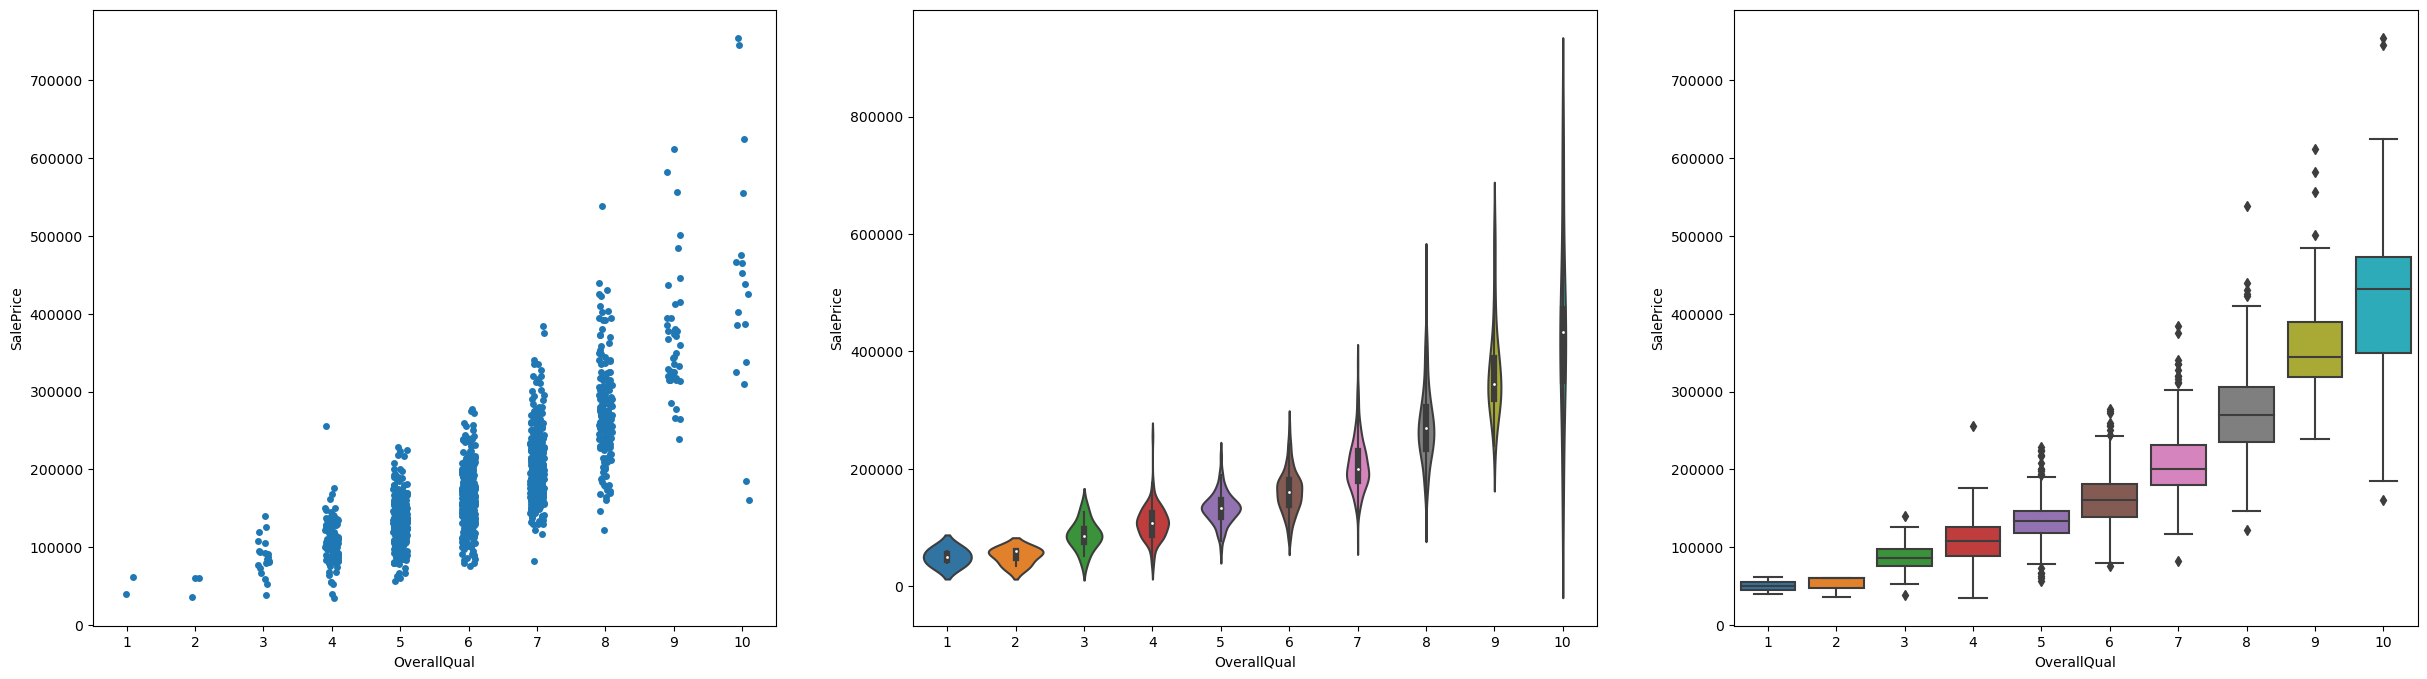

In [27]:
figure, ax = plt.subplots(1,3, figsize= (30,8))
sns.stripplot(x= 'OverallQual', y= 'SalePrice',data= train_df, ax = ax[0])
sns.violinplot(x= 'OverallQual', y= 'SalePrice',data= train_df, ax = ax[1])
sns.boxplot(x= 'OverallQual', y= 'SalePrice',data= train_df, ax = ax[2])

### NUMERICAL VARIABLES

<AxesSubplot:>

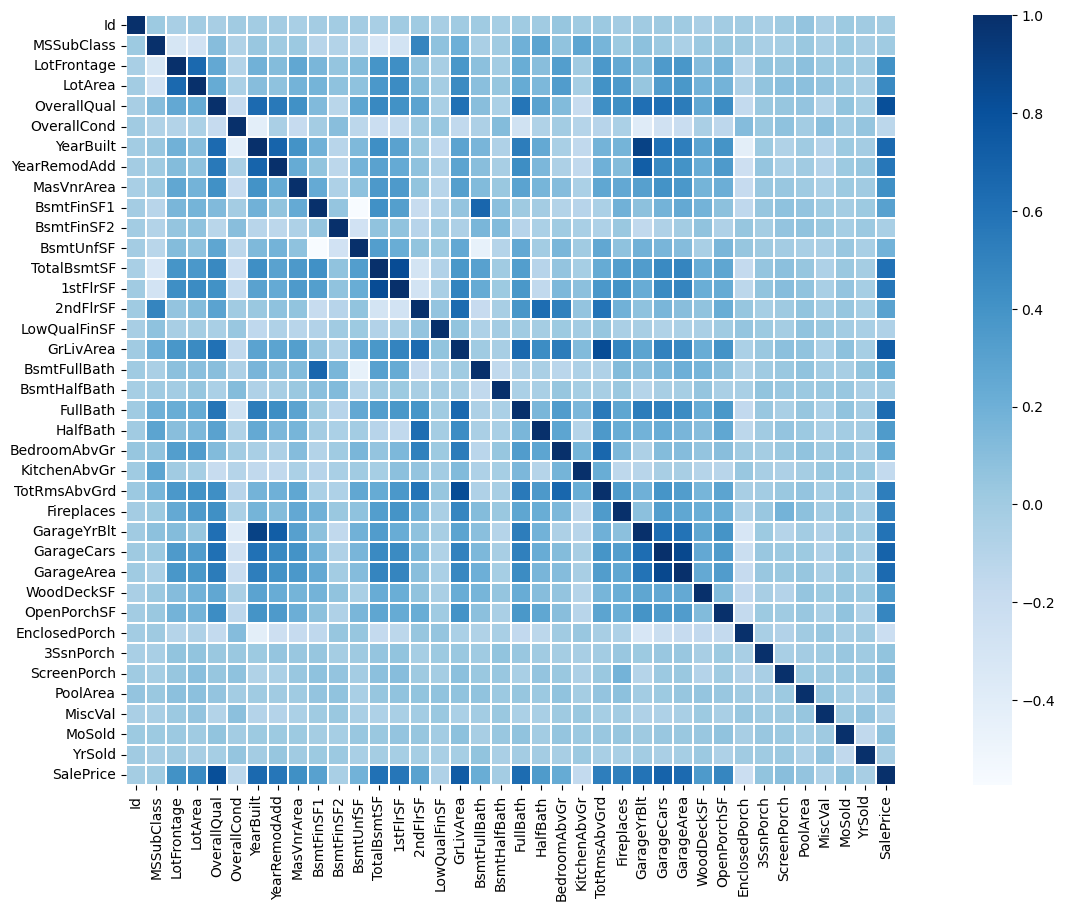

In [28]:
plt.figure(figsize= (20,10))
sns.heatmap(train_df[num_var].corr('spearman'), cmap= 'Blues',linewidths=0.2, square = True)

<AxesSubplot:>

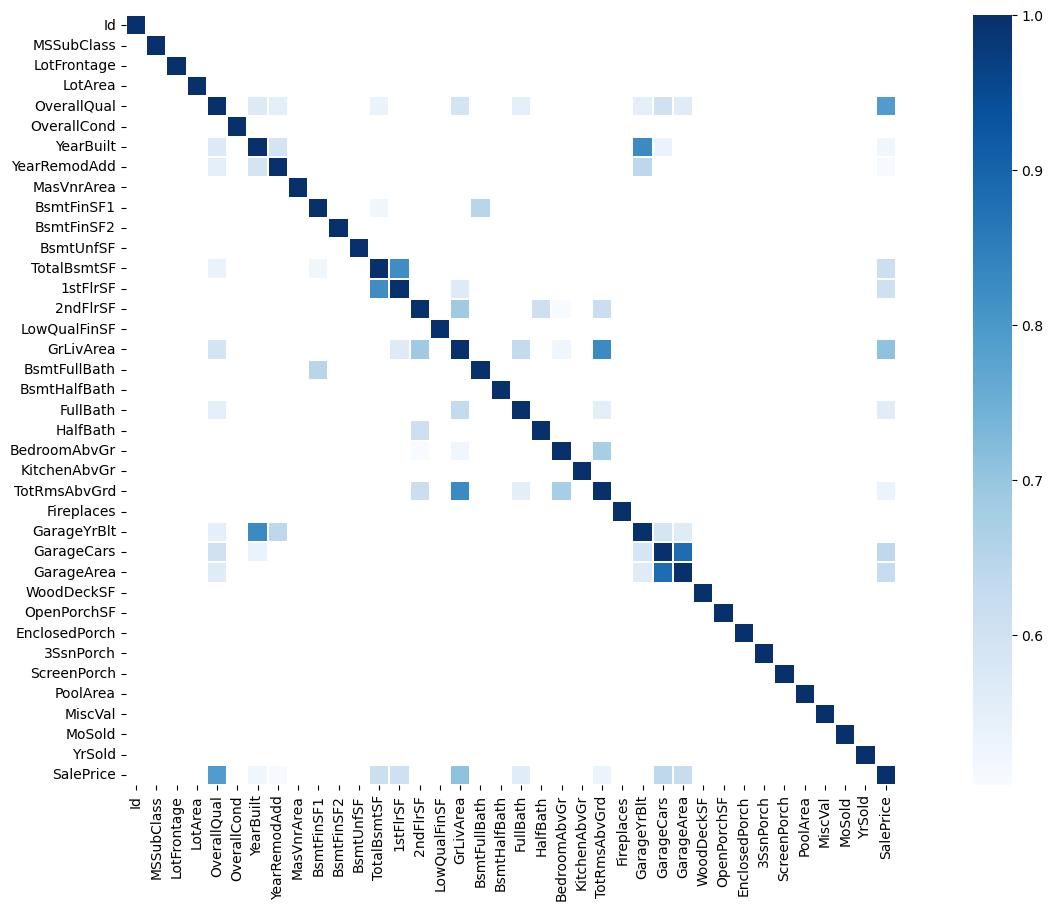

In [29]:
# Visualization of features correlated to more than .5 in training data

corr = train_df.corr()
kot = corr[(corr >= .5)]
plt.figure(figsize= (20,10))
sns.heatmap(kot, cmap= 'Blues',linewidths=0.2, square = True)

In [30]:
yrsold_v_saleprice_sum = train_df[['YrSold','SalePrice']].groupby('YrSold', as_index= False)['SalePrice'].sum().sort_values(by='YrSold', ascending= False)

In [31]:
yrsold_v_saleprice_sum

YrSold  SalePrice
4    2010   31043893
3    2009   60648051
2    2008   53917695
1    2007   61214777
0    2006   57320530

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

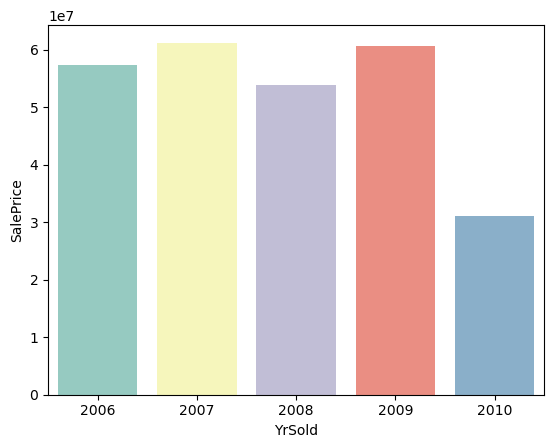

In [32]:
sns.barplot(x='YrSold', y= 'SalePrice', data= yrsold_v_saleprice_sum, palette = 'Set3')

In [33]:
sales_cor_cols = train_df.corr()['SalePrice'][(train_df.corr()['SalePrice'] > 0.3) & (train_df.corr()['SalePrice'] < 1.0)]
sales_cor_cols

LotFrontage     0.351799
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

<AxesSubplot:>

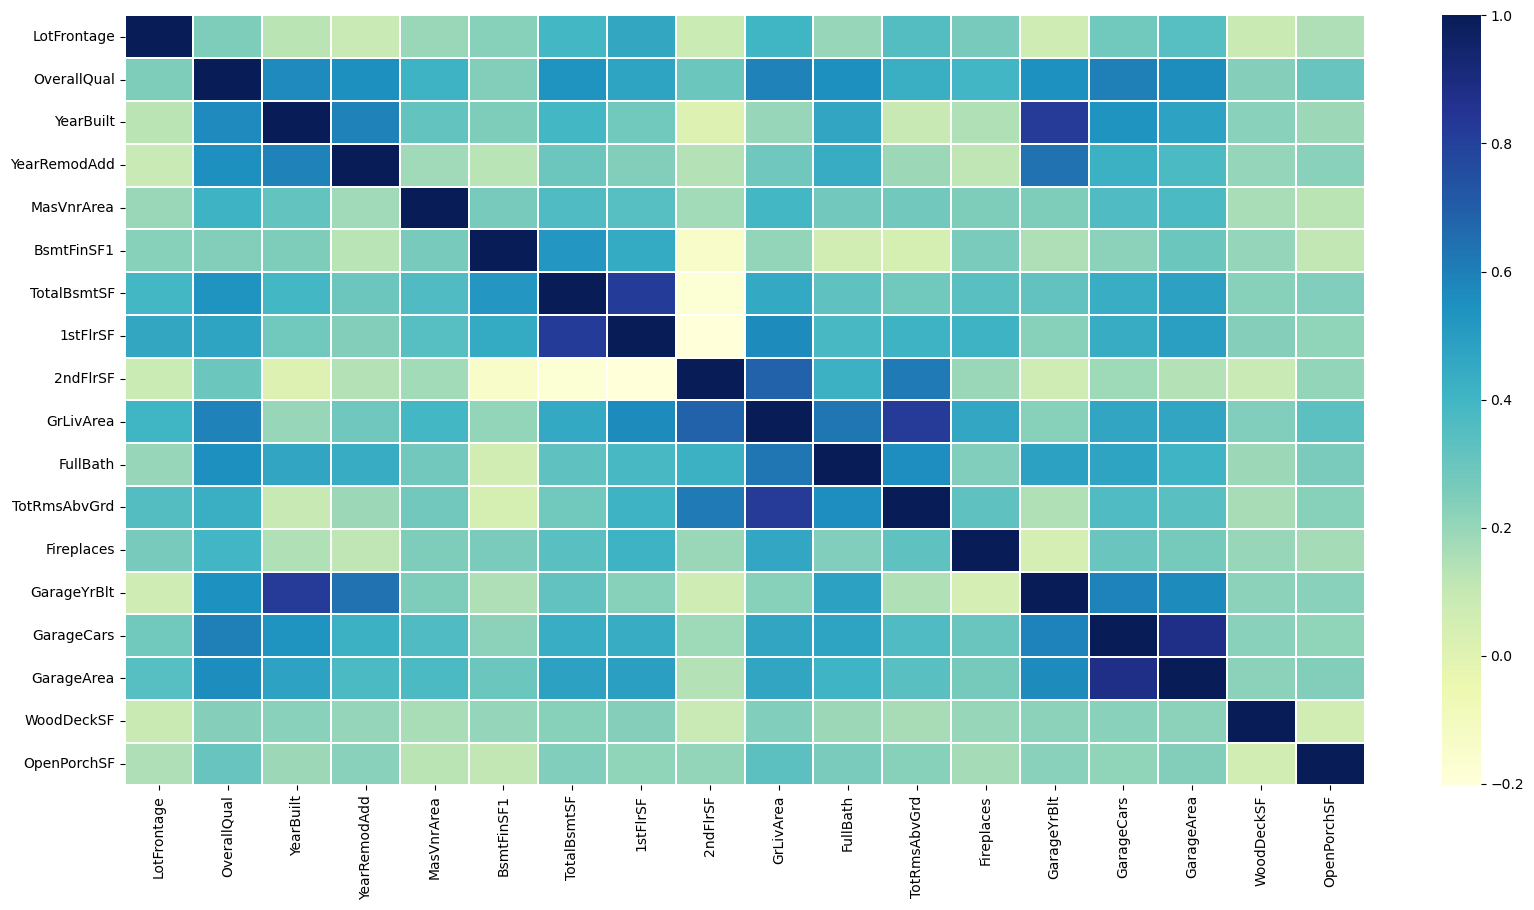

In [34]:
plt.figure(figsize= (20,10))
sns.heatmap(train_df[sales_cor_cols.index].corr(), cmap= 'YlGnBu', linewidths= .2)

In [35]:
sale_price_skew = train_df['SalePrice'].skew().round(2)
sale_price_skew

1.88

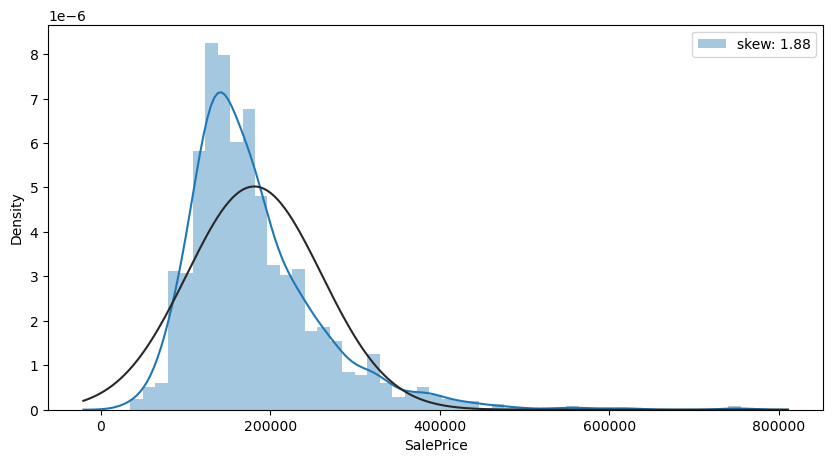

In [36]:
(mu,sigma) = norm.fit(train_df['SalePrice'])

plt.figure(figsize= (10,5))
sns.distplot(train_df['SalePrice'],fit=norm,  label= f'skew: {sale_price_skew}')
plt.legend()

### OUTLIERS DETECTION

In [37]:
#sns.pairplot(train_df)

<AxesSubplot:xlabel='GrLivArea'>

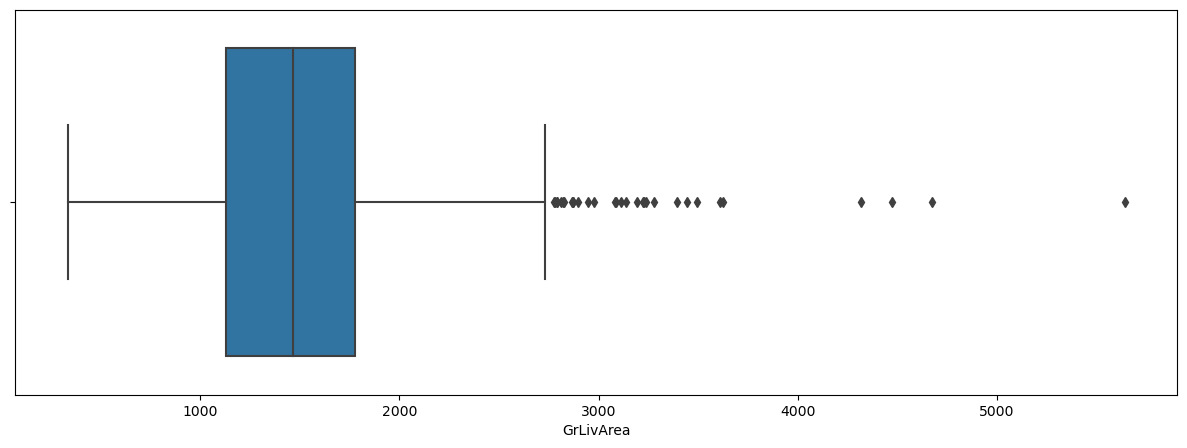

In [38]:
plt.figure(figsize= (15,5))
sns.boxplot(x= 'GrLivArea', data=train_df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

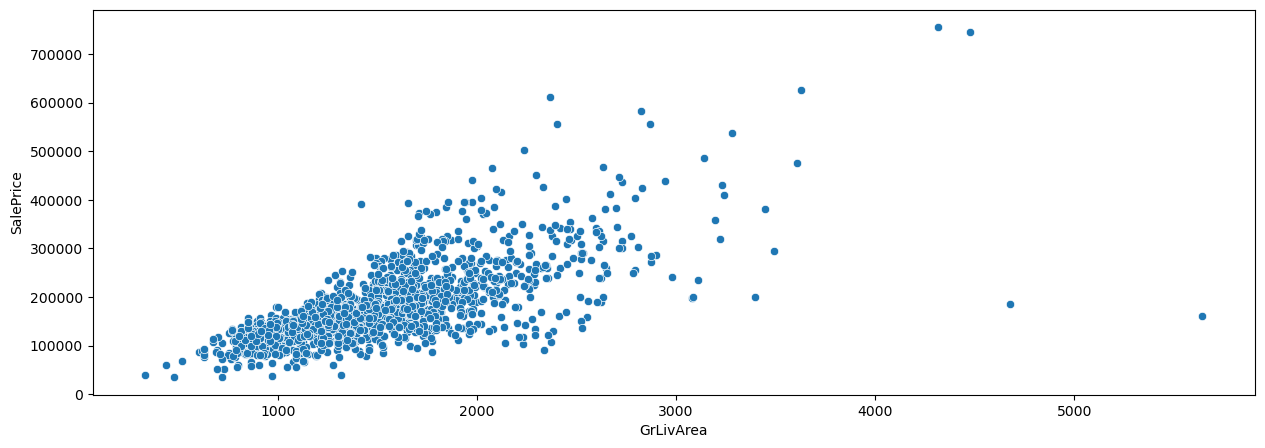

In [39]:
plt.figure(figsize= (15,5))
sns.scatterplot(y='SalePrice', x= 'GrLivArea', data=train_df)

#### DROP OUTLIERS

In [40]:
def outliers_present(df,nums_in_df):
    for col in nums_in_df:
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_df = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers_df


In [41]:
train_df_outliers = outliers_present(train_df, num_var)
train_df_outliers.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11    12          60       RL         85.0    11924   Pave   NaN      IR1   
53    54          20       RL         68.0    50271   Pave   NaN      IR1   
58    59          60       RL         66.0    13682   Pave   NaN      IR2   
112  113          60       RL         77.0     9965   Pave   NaN      Reg   
151  152          20       RL        107.0    13891   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
11          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
53          Low    AllPub  ...        0    NaN   NaN         NaN       0   
58          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
112         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
151         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
11       7   2006       New        Partial     345000  
53      11   2006        WD         Normal     385000  
58      10   2006       New        Partial     438780  
112     10   2007       New        Partial     383970  
151      1   2008       New        Partial     372402  

[5 rows x 81 columns]

In [42]:
def drop_outliers(df, nums_in_df):
    outliers_to_drop_df = outliers_present(df,nums_in_df)
    new_df = df.drop(outliers_to_drop_df.index, axis= 0).reset_index(drop = True)
    return new_df

In [43]:
train_df_before_outlier_drop = train_df.shape

In [44]:
train_df = drop_outliers(train_df, num_var)

In [45]:
print(f'Before train_df outlier drop: {train_df_before_outlier_drop}')
print(f'After train_df outlier drop: {train_df.shape}')

Before train_df outlier drop: (1460, 81)
After train_df outlier drop: (1399, 81)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

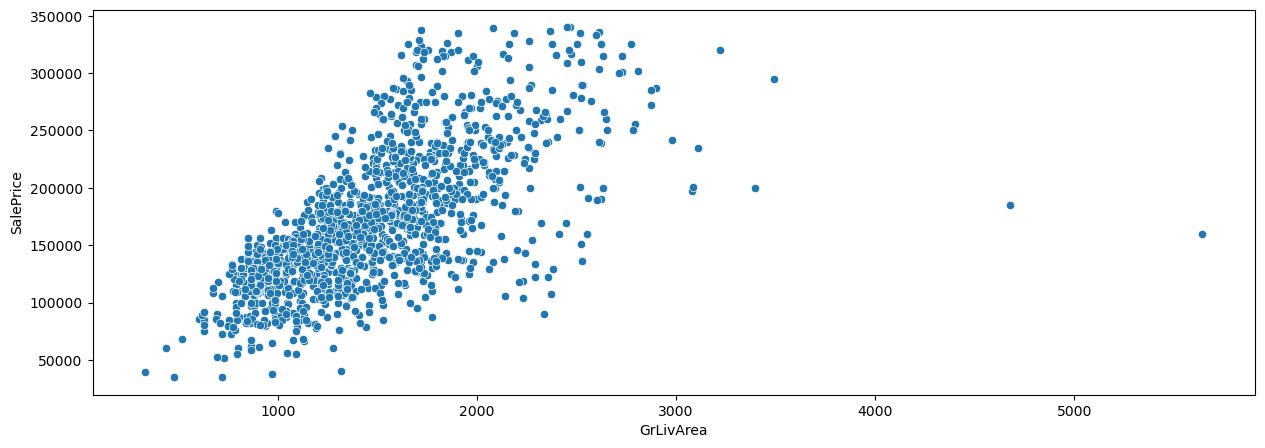

In [46]:
plt.figure(figsize= (15,5))
sns.scatterplot(y='SalePrice', x= 'GrLivArea', data=train_df)

### MISSING VALUES

In [47]:
train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)

In [48]:
num_var = [cols for cols in train_df if train_df[cols].dtype != 'object']
cat_var = [cols for cols in train_df if train_df[cols].dtype == 'object']

In [49]:
cat_var_test = [cols for cols in test_df if test_df[cols].dtype == 'object']
num_var_test = [cols for cols in test_df if test_df[cols].dtype != 'object']

<AxesSubplot:>

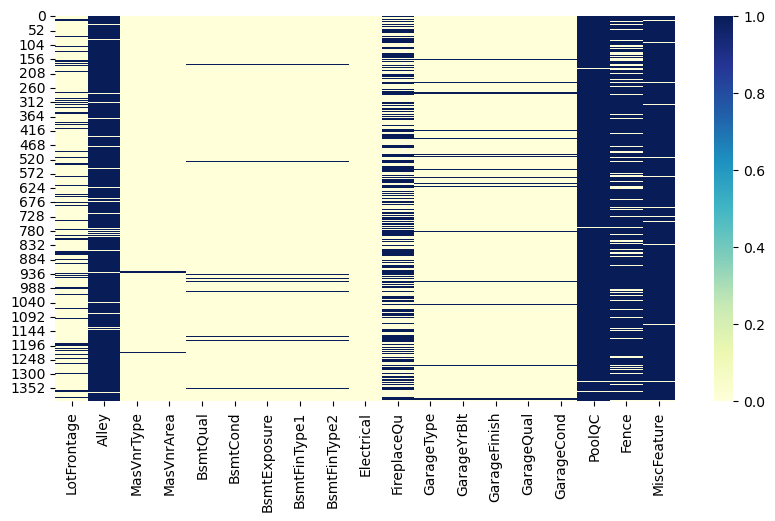

In [50]:
plt.figure(figsize= (10,5))
sns.heatmap(train_df[null_cols].isnull(),cmap= 'YlGnBu')

In [51]:
missing = train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   
missing

PoolQC          99.571122
MiscFeature     96.140100
Alley           93.495354
Fence           80.200143
FireplaceQu     49.249464
LotFrontage     18.298785
GarageType       5.789850
GarageYrBlt      5.789850
GarageFinish     5.789850
GarageQual       5.789850
GarageCond       5.789850
BsmtExposure     2.716226
BsmtFinType2     2.716226
BsmtFinType1     2.644746
BsmtCond         2.644746
BsmtQual         2.644746
MasVnrArea       0.500357
MasVnrType       0.500357
Electrical       0.071480
dtype: float64

<AxesSubplot:>

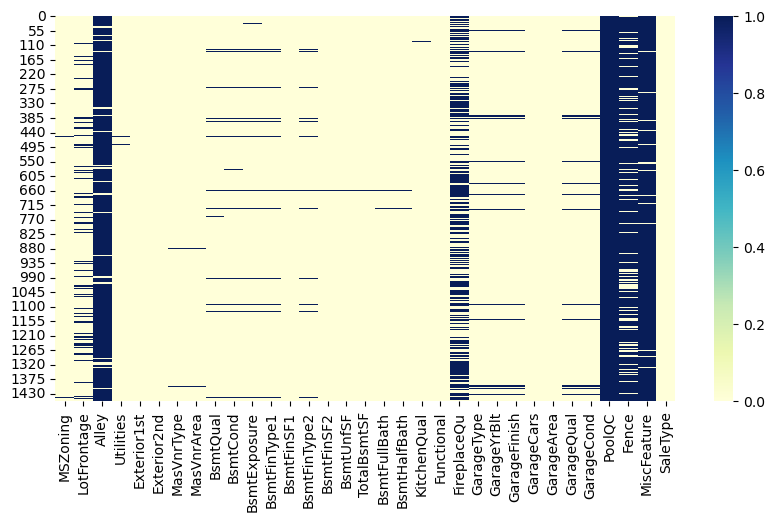

In [52]:
plt.figure(figsize= (10,5))
sns.heatmap(test_df[null_cols_test].isnull(),cmap= 'YlGnBu')

# IMPUTATION

In [53]:
none_imputer = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
             'GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2',"MasVnrType", 'MSSubClass']

In [54]:
for col in none_imputer:
   train_df[col] = train_df[col].fillna('None')

In [55]:
for col in none_imputer:
   test_df[col] = test_df[col].fillna('None')

In [56]:
train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   

LotFrontage     18.298785
GarageYrBlt      5.789850
MasVnrArea       0.500357
Electrical       0.071480
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinType2     0.000000
Alley            0.000000
FireplaceQu      0.000000
GarageType       0.000000
MasVnrType       0.000000
GarageFinish     0.000000
GarageQual       0.000000
GarageCond       0.000000
PoolQC           0.000000
Fence            0.000000
MiscFeature      0.000000
dtype: float64

<AxesSubplot:>

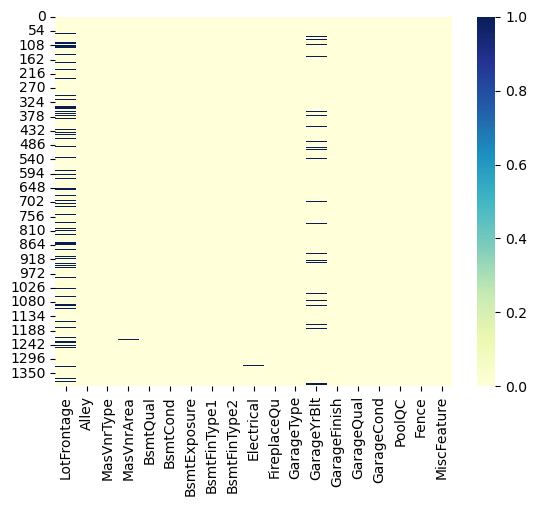

In [57]:
sns.heatmap(train_df[null_cols].isnull(), cmap= 'YlGnBu')

In [58]:
zero_imputer = [ 'GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]

In [59]:
for col in zero_imputer:
    train_df[col] = train_df[col].fillna(0)

In [60]:
for col in zero_imputer:
    test_df[col] = test_df[col].fillna(0)

In [61]:
train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   

LotFrontage     18.298785
Electrical       0.071480
MasVnrType       0.000000
GarageType       0.000000
Fence            0.000000
PoolQC           0.000000
GarageCond       0.000000
GarageQual       0.000000
GarageFinish     0.000000
GarageYrBlt      0.000000
FireplaceQu      0.000000
MasVnrArea       0.000000
Alley            0.000000
BsmtFinType2     0.000000
BsmtFinType1     0.000000
BsmtExposure     0.000000
BsmtCond         0.000000
BsmtQual         0.000000
MiscFeature      0.000000
dtype: float64

In [62]:
mode_imputer = [ 'MSZoning','Electrical','KitchenQual','Exterior1st',
                'Exterior2nd','SaleType','Functional','Utilities']

In [63]:
for col in mode_imputer:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [64]:
for col in mode_imputer:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [65]:
train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   

LotFrontage     18.298785
FireplaceQu      0.000000
Fence            0.000000
PoolQC           0.000000
GarageCond       0.000000
GarageQual       0.000000
GarageFinish     0.000000
GarageYrBlt      0.000000
GarageType       0.000000
Electrical       0.000000
Alley            0.000000
BsmtFinType2     0.000000
BsmtFinType1     0.000000
BsmtExposure     0.000000
BsmtCond         0.000000
BsmtQual         0.000000
MasVnrArea       0.000000
MasVnrType       0.000000
MiscFeature      0.000000
dtype: float64

In [66]:
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [67]:
test_df["LotFrontage"] = test_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [68]:
train_df[null_cols].isnull().mean().sort_values(ascending= False)*100   

LotFrontage     0.0
FireplaceQu     0.0
Fence           0.0
PoolQC          0.0
GarageCond      0.0
GarageQual      0.0
GarageFinish    0.0
GarageYrBlt     0.0
GarageType      0.0
Electrical      0.0
Alley           0.0
BsmtFinType2    0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
BsmtQual        0.0
MasVnrArea      0.0
MasVnrType      0.0
MiscFeature     0.0
dtype: float64

In [69]:
test_df[null_cols_test].isnull().mean().sort_values(ascending= False)*100   

MSZoning        0.0
BsmtFullBath    0.0
MiscFeature     0.0
Fence           0.0
PoolQC          0.0
GarageCond      0.0
GarageQual      0.0
GarageArea      0.0
GarageCars      0.0
GarageFinish    0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Functional      0.0
KitchenQual     0.0
BsmtHalfBath    0.0
TotalBsmtSF     0.0
LotFrontage     0.0
BsmtUnfSF       0.0
BsmtFinSF2      0.0
BsmtFinType2    0.0
BsmtFinSF1      0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
BsmtQual        0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
Exterior1st     0.0
Utilities       0.0
Alley           0.0
SaleType        0.0
dtype: float64

# ENCODING

In [70]:
combined_df = pd.concat([train_df,test_df], axis=0).reset_index(drop= True)

In [71]:
combined_df.isnull().sum().sort_values(ascending= False)

SalePrice      1459
MSZoning          0
GarageYrBlt       0
GarageType        0
FireplaceQu       0
               ... 
MasVnrArea        0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
CentralAir        0
Length: 80, dtype: int64

In [72]:
combined_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0   None  None        None   
1         Lvl    AllPub       FR2  ...        0   None  None        None   
2         Lvl    AllPub    Inside  ...        0   None  None        None   
3         Lvl    AllPub    Corner  ...        0   None  None        None   
4         Lvl    AllPub       FR2  ...        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal   208500.0  
1       0      5    2007        WD         Normal   181500.0  
2       0      9    2008        WD         Normal   223500.0  
3       0      2    2006        WD        Abnorml   140000.0  
4       0     12    2008        WD         Normal   250000.0  

[5 rows x 80 columns]

In [73]:
cat_var_combined = [cols for cols in combined_df if combined_df[cols].dtype == 'object']

In [74]:
for col in cat_var_combined:
    print(combined_df[col].value_counts(dropna= False))
    print()

RL         2211
RM          458
FV          138
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Pave    2846
Grvl      12
Name: Street, dtype: int64

None    2660
Grvl     120
Pave      78
Name: Alley, dtype: int64

Reg    1832
IR1     941
IR2      70
IR3      15
Name: LotShape, dtype: int64

Lvl    2572
Bnk     117
HLS     111
Low      58
Name: LandContour, dtype: int64

AllPub    2857
NoSeWa       1
Name: Utilities, dtype: int64

Inside     2089
Corner      503
CulDSac     168
FR2          84
FR3          14
Name: LotConfig, dtype: int64

Gtl    2722
Mod     121
Sev      15
Name: LandSlope, dtype: int64

NAmes      442
CollgCr    265
OldTown    238
Edwards    194
Somerst    180
Gilbert    164
Sawyer     151
NridgHt    139
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    100
IDOTRR      93
Timber      69
NoRidge     60
SWISU       48
ClearCr     44
StoneBr     42
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     23
NPkVill     23
Blueste     

In [75]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()

In [76]:
for col in cat_var_combined:
    combined_df[col] = lbl_encode.fit_transform(combined_df[col])

In [77]:
combined_df[cat_var_combined].head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      1         3            3          0          4   
1         3       1      1         3            3          0          2   
2         3       1      1         0            3          0          4   
3         3       1      1         0            3          0          0   
4         3       1      1         0            3          0          2   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0          0             5           2  ...           1             2   
1          0            24           1  ...           1             2   
2          0             5           2  ...           1             2   
3          0             6           2  ...           5             3   
4          0            15           2  ...           1             2   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           5           5           2       3      4            1         8   
1           5           5           2       3      4            1         8   
2           5           5           2       3      4            1         8   
3           5           5           2       3      4            1         8   
4           5           5           2       3      4            1         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              0  
4              4  

[5 rows x 43 columns]

In [78]:
combined_df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       1      1         3   
1          20         3         80.0     9600       1      1         3   
2          60         3         68.0    11250       1      1         0   
3          70         3         60.0     9550       1      1         0   
4          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0            3          0          4  ...         0       3      4   
1            3          0          2  ...         0       3      4   
2            3          0          4  ...         0       3      4   
3            3          0          0  ...         0       3      4   
4            3          0          2  ...         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1        0       2    2008         8              4   208500.0  
1            1        0       5    2007         8              4   181500.0  
2            1        0       9    2008         8              4   223500.0  
3            1        0       2    2006         8              0   140000.0  
4            1        0      12    2008         8              4   250000.0  

[5 rows x 80 columns]

# SPLIT DATASET

In [79]:
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]
test_df = test_df.drop('SalePrice', axis=1)

In [80]:
for i in train_df.columns:
    train_df[i] = train_df[i].astype('int32')
    
for i in test_df.columns:
    test_df[i] = test_df[i].astype('int32')

In [81]:
train_df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3           65     8450       1      1         3   
1          20         3           80     9600       1      1         3   
2          60         3           68    11250       1      1         0   
3          70         3           60     9550       1      1         0   
4          60         3           84    14260       1      1         0   

   LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0            3          0          4  ...         0       3      4   
1            3          0          2  ...         0       3      4   
2            3          0          4  ...         0       3      4   
3            3          0          0  ...         0       3      4   
4            3          0          2  ...         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1        0       2    2008         8              4     208500  
1            1        0       5    2007         8              4     181500  
2            1        0       9    2008         8              4     223500  
3            1        0       2    2006         8              0     140000  
4            1        0      12    2008         8              4     250000  

[5 rows x 80 columns]

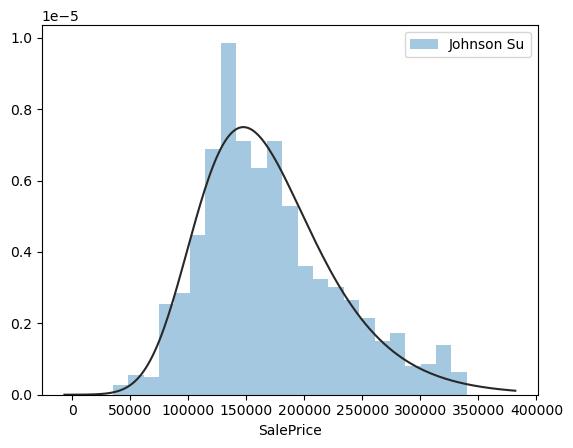

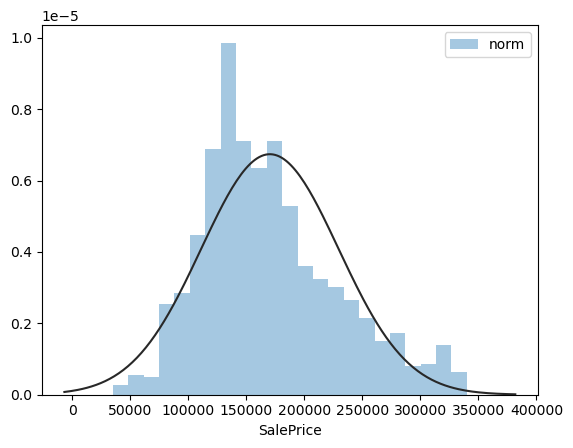

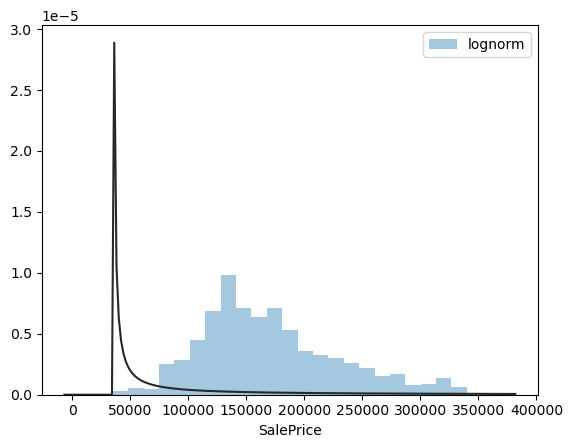

In [82]:
plt.figure(1)
sns.distplot(train_df['SalePrice'], kde= False, fit= johnsonsu, label= f'Johnson Su')
plt.legend()
plt.figure(2)
sns.distplot(train_df['SalePrice'], kde= False, fit= norm, label= 'norm')
plt.legend()
plt.figure(3)
sns.distplot(train_df['SalePrice'], kde= False, fit= lognorm, label= 'lognorm')
plt.legend()

# # NORMALIZATION & SCALING

In [83]:
skew_train =train_df.skew()
skew_test =test_df.skew()
skewness = pd.DataFrame({'Skew_Train' :skew_train,
                          'Skew_Test': skew_test})
skewness.head(10)

Skew_Train  Skew_Test
1stFlrSF        1.437226   1.558195
2ndFlrSF        0.749328   0.912883
3SsnPorch      10.710296  12.524216
Alley          -0.312777  -0.899765
BedroomAbvGr    0.279849   0.436623
BldgType        2.190747   2.144973
BsmtCond       -2.919305  -2.791715
BsmtExposure   -1.203756  -1.133275
BsmtFinSF1      1.874497   1.166330
BsmtFinSF2      4.219695   4.042954

In [84]:
for i in train_df.columns:
    train_df[i] = np.log1p(train_df[i])
    
for i in test_df.columns:
    test_df[i] = np.log1p(test_df[i])

In [85]:
skew_train_scaled =train_df.skew()
skew_test_scaled =test_df.skew()
skewness = pd.DataFrame({'Skew_Train' :skew_train,
                         'Skew Train Scaled': skew_train_scaled,
                          'Skew_Test': skew_test,
                          'Skew Test Scaled': skew_test_scaled
                          })

skewness.head(10)

Skew_Train  Skew Train Scaled  Skew_Test  Skew Test Scaled
1stFlrSF        1.437226           0.022111   1.558195          0.053499
2ndFlrSF        0.749328           0.299438   0.912883          0.321010
3SsnPorch      10.710296           7.923654  12.524216         10.543859
Alley          -0.312777          -2.826537  -0.899765         -2.854482
BedroomAbvGr    0.279849          -1.170505   0.436623         -0.717947
BldgType        2.190747           1.968201   2.144973          1.922475
BsmtCond       -2.919305          -3.389460  -2.791715         -3.231655
BsmtExposure   -1.203756          -1.515019  -1.133275         -1.500927
BsmtFinSF1      1.874497          -0.594098   1.166330         -0.616148
BsmtFinSF2      4.219695           2.480234   4.042954          2.408568

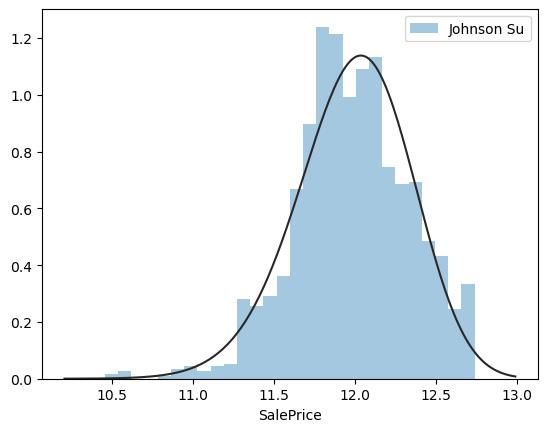

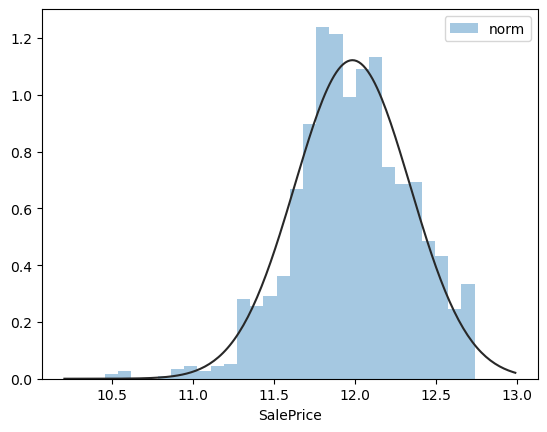

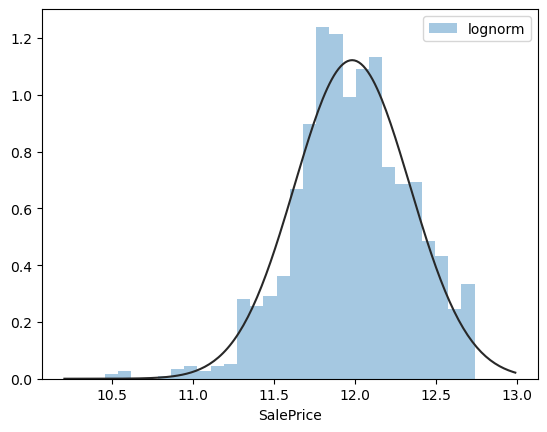

In [86]:
plt.figure(1)
sns.distplot(train_df['SalePrice'], kde= False, fit= johnsonsu, label= f'Johnson Su')
plt.legend()
plt.figure(2)
sns.distplot(train_df['SalePrice'], kde= False, fit= norm, label= 'norm')
plt.legend()
plt.figure(3)
sns.distplot(train_df['SalePrice'], kde= False, fit= lognorm, label= 'lognorm')
plt.legend()

In [87]:
x_train = train_df.drop('SalePrice', axis= 1)
y_train = train_df['SalePrice']

x_test = test_df.copy()

In [88]:
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1394    12.072547
1395    12.254868
1396    12.493133
1397    11.864469
1398    11.901590
Name: SalePrice, Length: 1399, dtype: float64

In [89]:
x_train.shape

(1399, 79)

In [90]:
y_train.shape

(1399,)

In [91]:
y_train.dtype

dtype('float64')

In [92]:
x_test.shape

(1459, 79)

In [93]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [94]:
for i in x_train.columns:
    x_train[i] = robust_scaler.fit_transform(x_train[i].values.reshape(-1,1))
      
for i in x_test.columns:
    x_test[i] = robust_scaler.transform(x_test[i].values.reshape(-1,1))


# MODELLING

In [95]:
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [96]:
lasso_reg = Lasso()
bayesian_ridge = BayesianRidge()
lasso_ic = LassoLarsIC()
grd_boost = GradientBoostingRegressor()
random_forest = RandomForestRegressor()
cat_boost = CatBoostRegressor()
light_gbm = LGBMRegressor(objective='regression')
stacked_reg = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

In [97]:
regression_algorithms = [lasso_reg,bayesian_ridge,lasso_ic,grd_boost,random_forest,cat_boost,light_gbm,stacked_reg ]

In [98]:
regression_algo_names = ['Lasso','Bayesian Ridge','Lasso Lars IC',
          'Gradient Boosting Regressor','Random Forest Regressor',
                         'Cat Boost','Light Gbm','Stacked Regressor']


## KFOLD CV

In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [100]:
k_fold = KFold(n_splits=10, shuffle= True, random_state=42)

In [101]:
'neg_root_mean_squared_error'

'neg_root_mean_squared_error'

In [102]:
kfold_cv_rmse = []
for algo in regression_algorithms:
    kfold_cv_rmse.append(np.sqrt(-cross_val_score(algo, x_train, y_train, cv= k_fold, n_jobs=1, scoring= 'neg_mean_squared_error', error_score= "raise")))
    

Learning rate set to 0.04246
0:	learn: 0.3468285	total: 58.7ms	remaining: 58.7s
1:	learn: 0.3380198	total: 63ms	remaining: 31.4s
2:	learn: 0.3293792	total: 67.5ms	remaining: 22.4s
3:	learn: 0.3211380	total: 71.7ms	remaining: 17.9s
4:	learn: 0.3137003	total: 76.1ms	remaining: 15.1s
5:	learn: 0.3063596	total: 79.9ms	remaining: 13.2s
6:	learn: 0.2992307	total: 83.9ms	remaining: 11.9s
7:	learn: 0.2923593	total: 88ms	remaining: 10.9s
8:	learn: 0.2864158	total: 92ms	remaining: 10.1s
9:	learn: 0.2799290	total: 96ms	remaining: 9.5s
10:	learn: 0.2729059	total: 99.9ms	remaining: 8.98s
11:	learn: 0.2670119	total: 104ms	remaining: 8.57s
12:	learn: 0.2614701	total: 108ms	remaining: 8.22s
13:	learn: 0.2557925	total: 112ms	remaining: 7.9s
14:	learn: 0.2499555	total: 116ms	remaining: 7.63s
15:	learn: 0.2447301	total: 120ms	remaining: 7.4s
16:	learn: 0.2395409	total: 125ms	remaining: 7.22s
17:	learn: 0.2346625	total: 129ms	remaining: 7.05s
18:	learn: 0.2305705	total: 133ms	remaining: 6.89s
19:	learn: 0

In [103]:
kfold_cv_rmse

[array([0.33872007, 0.30202916, 0.30291515, 0.32980584, 0.33468759,
        0.36748761, 0.28910194, 0.33985885, 0.34909919, 0.37743208]),
 array([0.11985696, 0.11980124, 0.10921976, 0.11629104, 0.13607939,
        0.13021084, 0.14792168, 0.11052608, 0.12174229, 0.18937639]),
 array([0.12432452, 0.1207806 , 0.1076227 , 0.11525766, 0.13577327,
        0.13571676, 0.14738814, 0.11002539, 0.1217184 , 0.18251983]),
 array([0.12080526, 0.12513569, 0.10957757, 0.12322717, 0.14563076,
        0.12586024, 0.1059789 , 0.11150766, 0.11940343, 0.14669095]),
 array([0.14040805, 0.11392734, 0.10411949, 0.13169687, 0.14881399,
        0.14359313, 0.11743413, 0.12793865, 0.14186587, 0.16972192]),
 array([0.10431219, 0.11029137, 0.09380933, 0.11348682, 0.13358587,
        0.12030865, 0.10417802, 0.1029721 , 0.11019496, 0.15360124]),
 array([0.12660272, 0.11404318, 0.10663152, 0.11940152, 0.14766403,
        0.12547561, 0.10999179, 0.11511138, 0.12759618, 0.15608638]),
 array([0.10877713, 0.11278722, 0.

In [104]:
cv_mean = []
cv_std_dev = []
for results in kfold_cv_rmse:
    cv_mean.append(results.mean())
    cv_std_dev.append(results.std())

In [105]:
models_results = pd.DataFrame(
     {
        'Model': regression_algo_names,
        'CV RMSE Mean': cv_mean,
        'CV RMSE Std Dev': cv_std_dev
      }
     )

models_results.sort_values(by= 'CV RMSE Mean', ascending= False, ignore_index= True)

Model  CV RMSE Mean  CV RMSE Std Dev
0                        Lasso      0.333114         0.027031
1      Random Forest Regressor      0.133952         0.018173
2                Lasso Lars IC      0.130113         0.021046
3               Bayesian Ridge      0.130103         0.022711
4                    Light Gbm      0.124860         0.015170
5  Gradient Boosting Regressor      0.123382         0.013055
6            Stacked Regressor      0.116060         0.015066
7                    Cat Boost      0.114674         0.016538

Text(0, 0.5, 'Regressors')

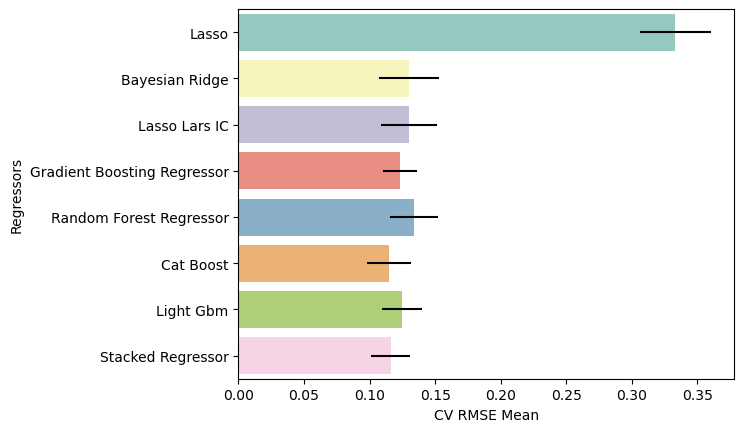

In [106]:
sns.barplot(x= 'CV RMSE Mean',y= 'Model',data= models_results, palette = 'Set3', **{'xerr': cv_std_dev})
plt.ylabel('Regressors')

In [107]:
# Cat Boost Regressor
cat_model = cat_boost.fit(x_train,y_train,verbose = 0)

# HYPERPARAMETER TUNING - CAT BOOST

In [108]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [109]:
# Catboost default paramters
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.04317399859428406,
 'score_function': '

In [110]:
grid = {'iterations': [10,20],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

cat_boost_grid_cv = GridSearchCV(cat_boost, param_grid = grid, scoring= 'neg_mean_squared_error', 
                               cv = k_fold, verbose= 5, n_jobs = -1)

In [111]:
cat_boost_grid_cv.fit(x_train,y_train,early_stopping_rounds=3)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
0:	learn: 0.3454511	total: 52.9ms	remaining: 476ms
1:	learn: 0.3354489	total: 60.7ms	remaining: 243ms
2:	learn: 0.3259631	total: 62.6ms	remaining: 146ms
3:	learn: 0.3166371	total: 65.3ms	remaining: 97.9ms
4:	learn: 0.3083831	total: 69.7ms	remaining: 69.7ms
5:	learn: 0.3000457	total: 71.8ms	remaining: 47.9ms
6:	learn: 0.2921953	total: 73.7ms	remaining: 31.6ms
7:	learn: 0.2845363	total: 78.8ms	remaining: 19.7ms
8:	learn: 0.2772543	total: 84.4ms	remaining: 9.38ms
9:	learn: 0.2705514	total: 86.7ms	remaining: 0us
[CV 1/10] END depth=4, iterations=10, l2_leaf_reg=1, learning_rate=0.05;, score=-0.070 total time=   0.2s
0:	learn: 0.3474044	total: 3.9ms	remaining: 35.1ms
1:	learn: 0.3371565	total: 6ms	remaining: 24ms
2:	learn: 0.3272233	total: 9.14ms	remaining: 21.3ms
3:	learn: 0.3183671	total: 11.2ms	remaining: 16.8ms
4:	learn: 0.3092046	total: 14.9ms	remaining: 14.9ms
5:	learn: 0.3009093	total: 16.9ms	remaining: 11.3ms
6:	learn: 0

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x7f361a9cbad0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 10], 'iterations': [10, 20],
                         'l2_leaf_reg': [1, 3, 5, 9],
                         'learning_rate': [0.05, 0.005, 0.0005]},
             scoring='neg_mean_squared_error', verbose=5)

In [112]:
cat_boost_grid_cv.best_score_

-0.04558775889130175

In [113]:
cat_boost_grid_cv.best_params_

{'depth': 6, 'iterations': 20, 'l2_leaf_reg': 1, 'learning_rate': 0.05}

In [114]:
prediction_cat = cat_boost_grid_cv.predict(x_test)
prediction_cat

array([12.02600295, 12.12707244, 12.04286206, ..., 12.02613549,
       11.98560282, 12.13897471])

In [115]:
submission_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [116]:
submission_df["SalePrice"] = np.expm1(prediction_cat)

In [117]:
submission_df.head()

Id      SalePrice
0  1461  167041.400496
1  1462  184806.946843
2  1463  169881.459203
3  1464  185553.349362
4  1465  189558.278072

In [118]:
submission_df.to_csv('submission.csv', index=False)